In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
### Read in inputs dataframe as well as weights and target series from job 03_var_reduction.ipynb
new_X_train = pickle.load(open("new_train_inputs.p",'rb'))
new_X_test = pickle.load(open("new_test_inputs.p",'rb'))
y_train = pickle.load(open("y_train.p",'rb'))
y_test = pickle.load(open("y_test.p",'rb'))
wt_train_ = pickle.load(open("wt_train_.p",'rb'))
wt_test_ = pickle.load(open("wt_test_.p",'rb'))

In [16]:
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(new_X_train)
pcafeatures_test = pca.fit_transform(new_X_test)

In [18]:
from sklearn.neural_network import MLPClassifier
mlp2 = MLPClassifier(solver='adam', activation="relu",max_iter=1000,hidden_layer_sizes=(3,4,3))
mlp2.fit(pcafeatures_train, y_train)
y_pred = mlp2.predict(pcafeatures_train)
print('train:',metrics.accuracy_score(y_train, y_pred))
y_pred = mlp2.predict(pcafeatures_test)
print('test:', metrics.accuracy_score(y_test, y_pred))

train: 0.124286620165
test: 0.124920735574


In [19]:
mlp2 = MLPClassifier(solver='adam', activation="relu",max_iter=1000,hidden_layer_sizes=(3,4,3))
mlp2.fit(pcafeatures_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Training Data Accuracy: 0.17
Test Data Accuracy:     0.14


Precision:              nan
Recall:                 0.00

Confusion Matrix:

[[ 0  0  0 41 50 12  0  0  0  0  0  9]
 [ 0  0  0 35 52 29  0  0  0  0  0  2]
 [ 0  0  0 32 39 30  0  0  0  0  0 12]
 [ 0  0  0 90 47 15  0  0  0  0  0 11]
 [ 0  0  0 28 74 41  0  0  0  0  0 24]
 [ 0  1  0 45 66 36  0  0  0  0  0  8]
 [ 0  0  0 48 69 28  0  0  0  0  0 14]
 [ 0  0  0 22 53 18  0  0  0  0  0 11]
 [ 0  0  0 18 26 13  0  0  0  0  0  4]
 [ 0  0  0 37 74 16  0  0  0  0  0  7]
 [ 0  0  0 50 60 23  0  0  0  0  0 14]
 [ 0  0  0 67 58 17  0  0  0  0  0 19]]


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


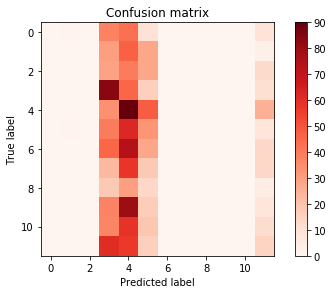

In [21]:

from sklearn.metrics import confusion_matrix
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

train_acc=mlp2.score(pcafeatures_train, y_train,sample_weight=wt_train_)
test_acc=mlp2.score(pcafeatures_test,y_test,sample_weight=wt_test_)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = mlp2.predict(pcafeatures_test)
conf = confusion_matrix(y_true, y_pred, sample_weight=wt_test_)
print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ('\nConfusion Matrix:\n')
print(conf.astype(int))

cm=confusion_matrix(y_true, y_pred, labels=None)

plt.figure()
plot_confusion_matrix(cm)